# Data EDA

In [11]:
from src.dataset import FacialKeypointsDataset


training_dataset = FacialKeypointsDataset(
    'data/training_frames_keypoints.csv',
    'data/training'
)

test_dataset = FacialKeypointsDataset(
    'data/test_frames_keypoints.csv',
    'data/test'
)

In [12]:
len(training_dataset), len(test_dataset)

(3462, 770)

In [13]:
i = training_dataset[0]
image, keypoints = i['image'], i['keypoints']
print(type(image), image.shape)
print(keypoints.shape)

<class 'numpy.ndarray'> (192, 176, 3)
(68, 2)


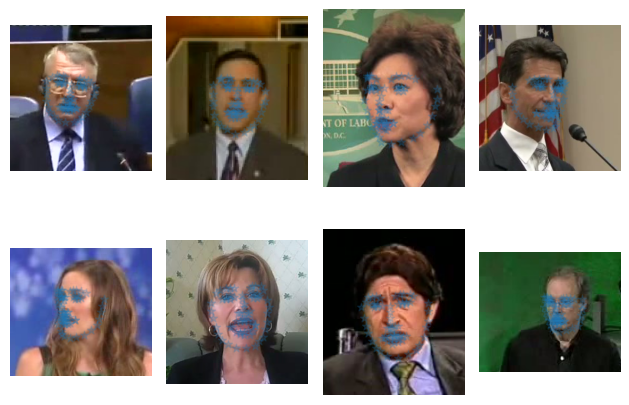

In [14]:
# * Plotting example images
import matplotlib.pyplot as plt 
%matplotlib inline

import random 


fig, axs = plt.subplots(2, 4, tight_layout=True)
for i in range(8):
    idx = random.randint(0, len(training_dataset))
    sample = training_dataset[idx]
    image, keypoints = sample['image'], sample['keypoints']

    # * Plotting Image
    ax = axs[i % 2,  i // 2]
    ax.imshow(image)
    ax.axis('off')


    ax.scatter(keypoints[:, 0], keypoints[:, 1], marker='*', alpha=0.2,  linewidths=1)

    # break 

plt.show()

# Model Stuff

In [15]:
from src.models import ResNet_landmark

model = ResNet_landmark()

Using cache found in /Users/abdulahadbutt/.cache/torch/hub/pytorch_vision_v0.10.0


In [16]:
import torch 
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
sample_image = training_dataset[0]['image']


input_sample = transform(sample_image)
input_sample.shape


torch.Size([3, 192, 176])

In [17]:
input_sample.shape
input_sample = input_sample.unsqueeze(0)
input_sample.shape


torch.Size([1, 3, 192, 176])

In [18]:
model(input_sample)

tensor([[-0.8965, -0.4707,  0.1385,  1.3080,  0.7437,  0.2231, -0.8606,  0.0592,
         -0.2447, -0.3849, -0.5877, -0.4635, -0.6013,  0.2925, -0.3511,  0.5660,
         -0.3667, -0.2261, -0.3139, -0.8401,  0.1553,  0.8955, -0.0065, -0.5613,
          0.0559,  0.2852,  0.0368, -1.0000, -0.3674,  0.4226,  0.4994, -0.9191,
          0.1775, -1.1988,  0.6958, -0.7647, -0.3088,  0.2186,  0.0957,  0.4394,
         -0.0663,  0.6886, -0.4580, -0.0057,  0.2797, -0.0460, -0.4572,  0.3234,
          0.6502,  1.1455, -0.7515,  0.3596, -0.7260, -0.3261, -0.5650,  0.5431,
         -0.3226, -0.6206,  0.3527, -0.2283,  0.7916, -0.0052,  0.8234,  0.7191,
         -0.6611,  0.3051,  0.2179, -0.5100, -1.0203, -0.1083, -0.0772,  0.1036,
          0.6668,  0.0781, -0.0943,  0.0659,  0.9701,  0.6994,  0.2325, -1.0721,
         -0.4305,  0.1738,  0.4569,  0.1314, -0.1123, -0.3158, -0.4006, -0.7136,
          1.1857, -0.1779,  0.0557, -0.2631,  0.4726, -0.1546,  0.6681, -0.4567,
         -0.0771, -0.8364, -

# Train Stuff

In [19]:
ROOT_DIR = 'data'
IMG_SIZE = 224

image_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465],
            std=[0.2023, 0.1994, 0.2010],
        )
])
train_dataset = FacialKeypointsDataset(
    f'{ROOT_DIR}/training_frames_keypoints.csv',
    f'{ROOT_DIR}/training',
    image_transforms
)

for i in train_dataset:
    print(i)
    break 

TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

In [ ]:
data_loader = torch.utils.data.DataLoader(
    training_dataset, batch_size=10, shuffle=True
)

In [ ]:
from tqdm import tqdm 
epoch_index = 0
with tqdm(data_loader, unit='batch') as data:
        batch_loss_list = []
        for batch in data:
            data.set_description(f"Epoch {epoch_index}")

  0%|          | 0/347 [00:00<?, ?batch/s]


RuntimeError: stack expects each tensor to be equal size, but got [158, 128, 3] at entry 0 and [308, 286, 3] at entry 1